# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [2]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [3]:
# url string that hosts our .csv file
url = "/content/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url)



# Exploring the content of the data set

Get a general 'feel' of the data


In [6]:
df.describe()


,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,52.000000,51.000000,52.000000,52.000000,51.000000,51.000000,52.000000,51.000000,52.000000
mean,26.500000,28.411765,1.500000,0.500000,68.971569,67.313725,85.576923,0.843137,7.173077
std,15.154757,5.755611,0.504878,0.504878,5.303812,5.624021,14.353173,0.367290,2.211566
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.000000,2.000000
25%,13.750000,25.000000,1.000000,0.000000,64.500000,63.000000,72.000000,1.000000,6.000000
50%,26.500000,27.000000,1.500000,0.500000,69.000000,66.000000,85.000000,1.000000,8.000000
75%,39.250000,30.000000,2.000000,1.000000,73.000000,72.000000,96.500000,1.000000,9.000000
max,52.000000,56.000000,2.000000,1.000000,79.500000,76.000000,115.000000,1.000000,10.000000


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [7]:
# Number of times that each distinct value of a variable occurs in a data set
df['Age'].value_counts()


,count
Age,
26.0,7
27.0,7
24.0,5
28.0,5
23.0,5
25.0,4
30.0,4
33.0,3
39.0,2


In [8]:
# Proportion of each distinct value of a variable occurs in a data set
df['Age'].value_counts(normalize=True)


,proportion
Age,
26.0,0.137255
27.0,0.137255
24.0,0.098039
28.0,0.098039
23.0,0.098039
25.0,0.078431
30.0,0.078431
33.0,0.058824
39.0,0.039216


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [18]:
# Total number of observations
print("Total Observations: ",df.shape[0])


# total number of null observations in Age
print("Null Values: ",df.Age.isnull().sum())


# Total number of counts in Age (excluding missing values)
print("Counts: ",df.Age.value_counts().sum())



Total Observations:  52
Null Values:  1
Counts:  51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

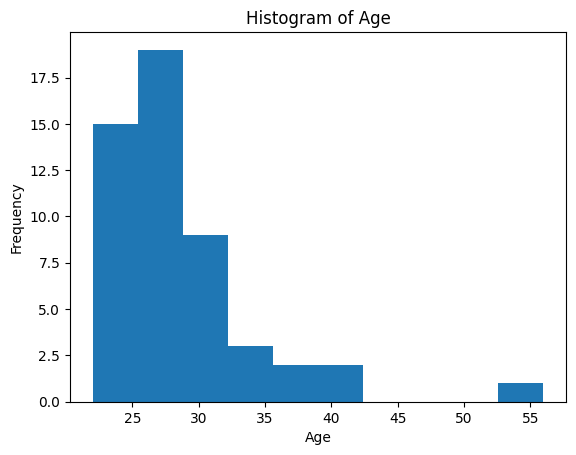

In [19]:
# Plot histogram of Age
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


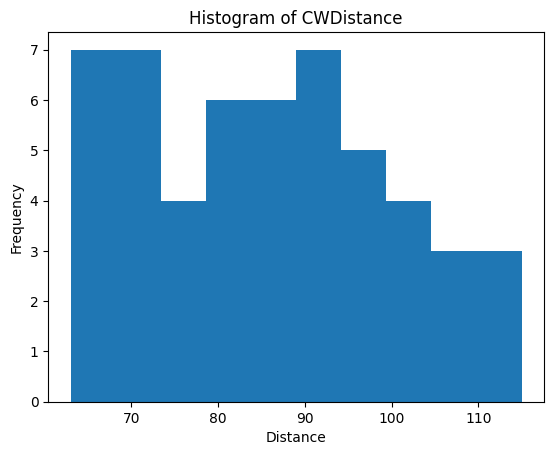

In [20]:
# Plot distribution of CWDistance
plt.hist(df['CWDistance'])
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of CWDistance')
plt.show()


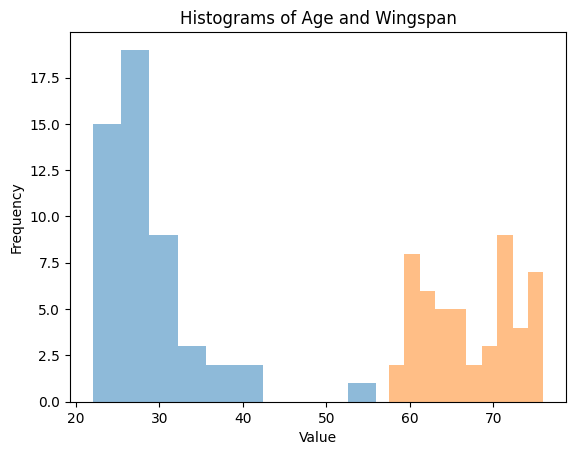

In [23]:
# Plot histogram of both the Age and the Wingspan

plt.hist(df['Age'], alpha=0.5, label='Age')
plt.hist(df['Wingspan'], alpha=0.5, label='Wingspan')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Age and Wingspan')
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

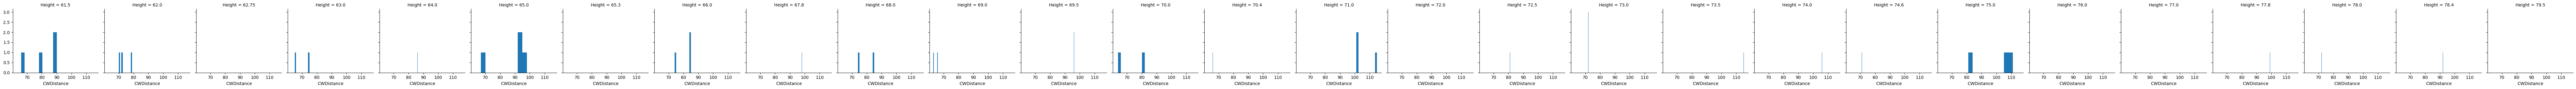

In [26]:

g = sns.FacetGrid(df, col="Height")
g.map(plt.hist, "CWDistance")
plt.show()




# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

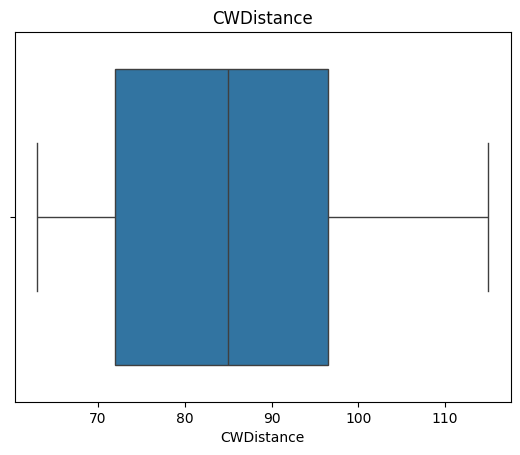

In [29]:
# Create the boxplot of the "CWDistance"

sns.boxplot(data=df, x='CWDistance')
plt.title('CWDistance')
plt.show()

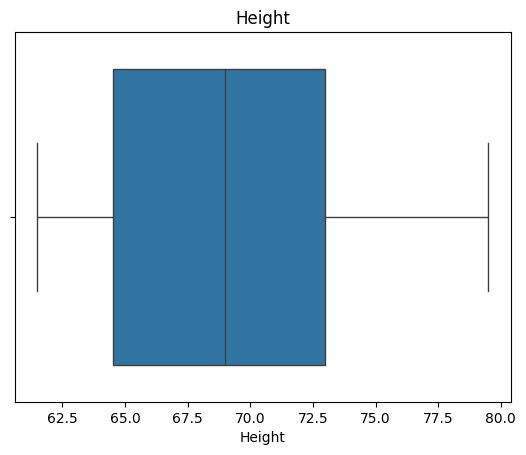

In [30]:
# Create the boxplot of the "Height"

sns.boxplot(data=df, x='Height')
plt.title('Height')
plt.show()

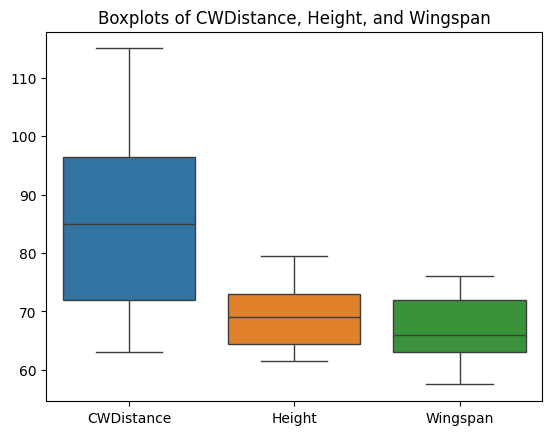

In [42]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"
sns.boxplot(data=df[['CWDistance', 'Height', 'Wingspan']])
plt.title('Boxplots of CWDistance, Height, and Wingspan')
plt.show()

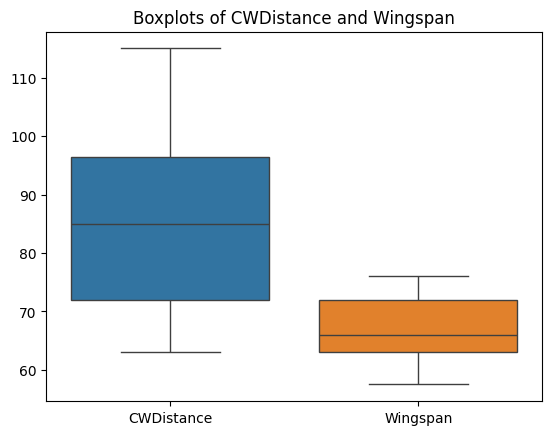

In [43]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"

sns.boxplot(data=df[['CWDistance', 'Wingspan']])
plt.title('Boxplots of CWDistance and Wingspan')
plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

<Axes: ylabel='CWDistance'>

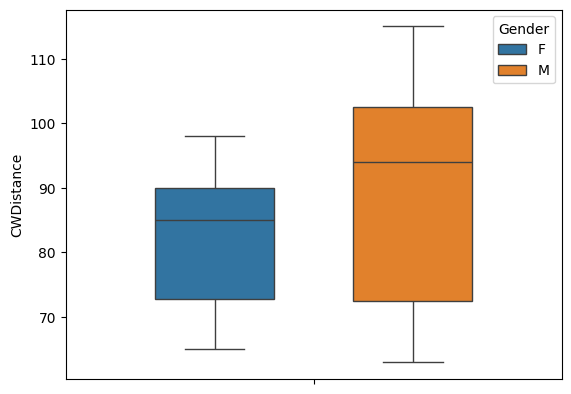

In [44]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)



<Axes: xlabel='Glasses', ylabel='Height'>

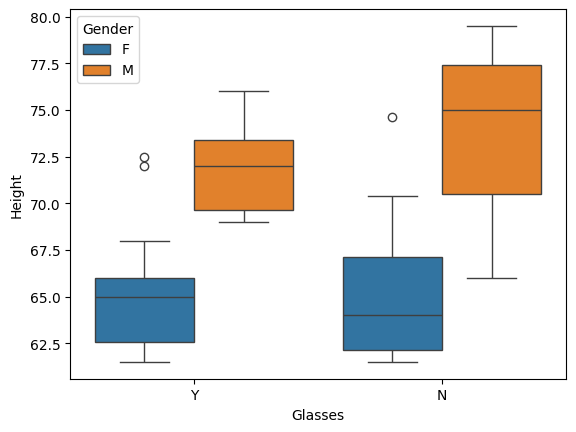

In [45]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


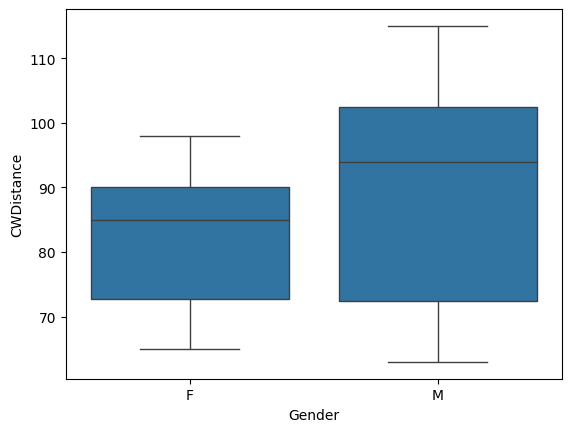

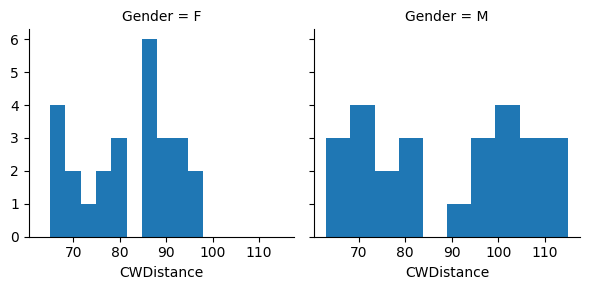

In [49]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"
sns.boxplot(data=df, x="Gender", y="CWDistance")
plt.show()
g = sns.FacetGrid(df, col="Gender")
g.map(plt.hist, "CWDistance")
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

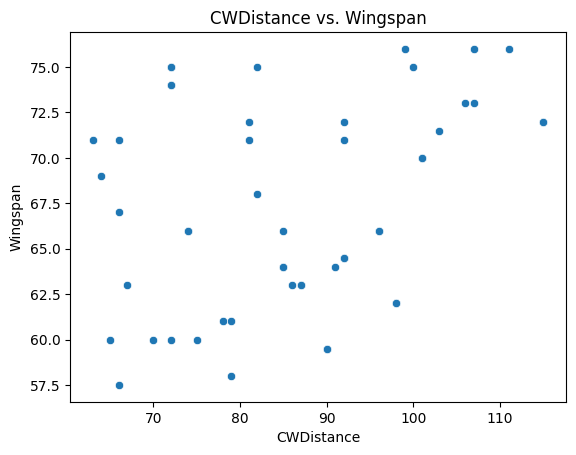

In [50]:
# scatter plot between two variables
sns.scatterplot(x='CWDistance', y='Wingspan', data=df)
plt.title('CWDistance vs. Wingspan')
plt.xlabel('CWDistance')
plt.ylabel('Wingspan')
plt.show()

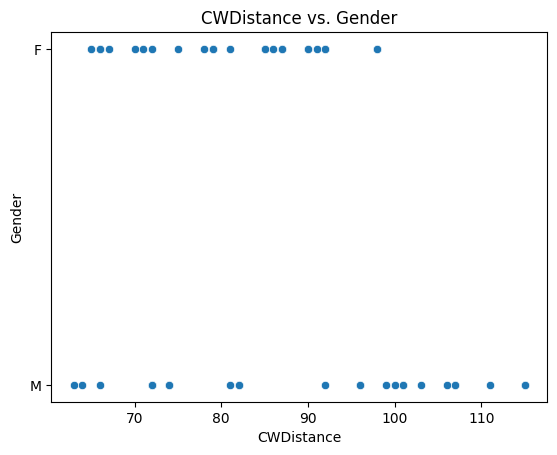

In [51]:
# scatter plot between two variables (one categorical)
sns.scatterplot(x='CWDistance', y='Gender', data=df)
plt.title('CWDistance vs. Gender')
plt.xlabel('CWDistance')
plt.ylabel('Gender')
plt.show()

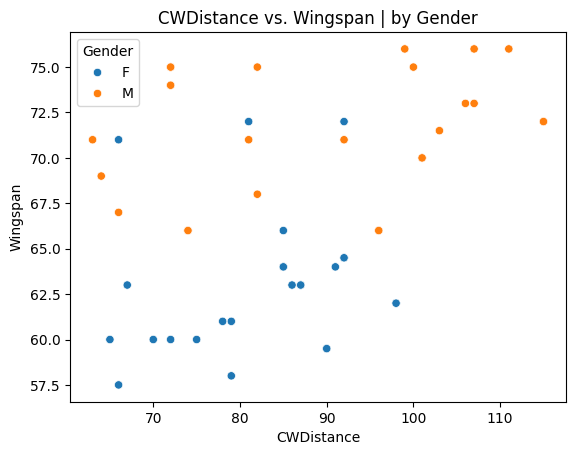

In [53]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(x='CWDistance', y='Wingspan', hue='Gender', data=df)
plt.title('CWDistance vs. Wingspan | by Gender')
plt.xlabel('CWDistance')
plt.ylabel('Wingspan')
plt.show()

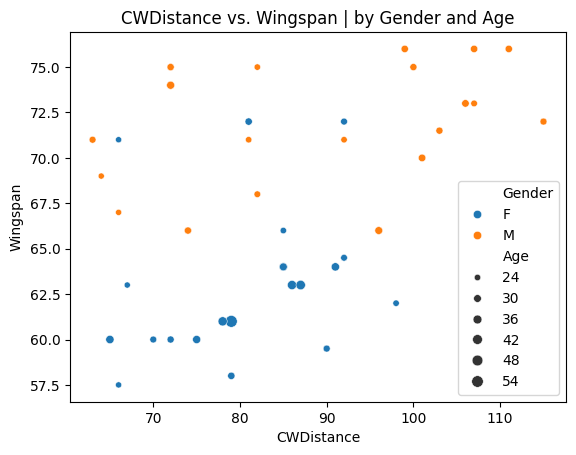

In [54]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers

sns.scatterplot(x='CWDistance', y='Wingspan', hue='Gender', size='Age', data=df)
plt.title('CWDistance vs. Wingspan | by Gender and Age')
plt.xlabel('CWDistance')
plt.ylabel('Wingspan')
plt.show()

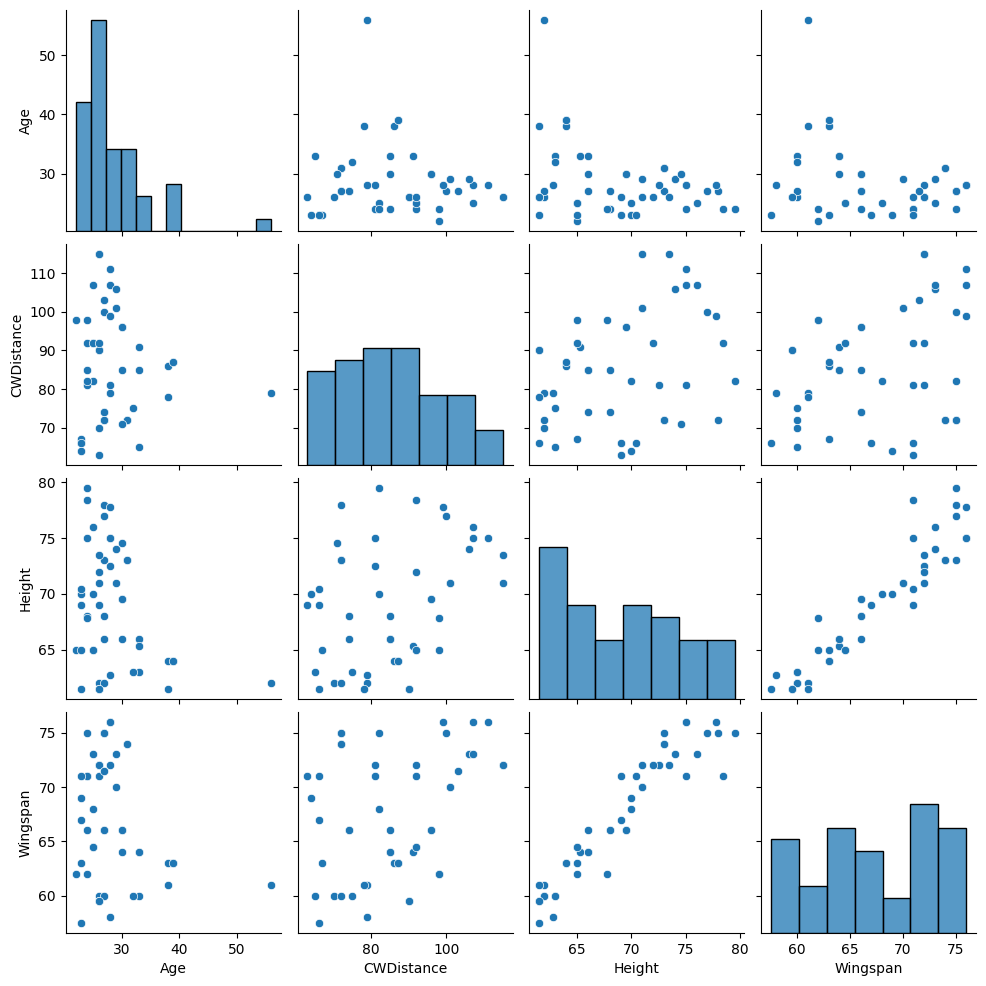

In [55]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'
sns.pairplot(df[['Age', 'CWDistance', 'Height', 'Wingspan']])
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


In [56]:
#Read Dataset
iris = pd.read_excel('/content/iris.xlsx')
iris.drop(columns=['Id'], inplace = True)
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


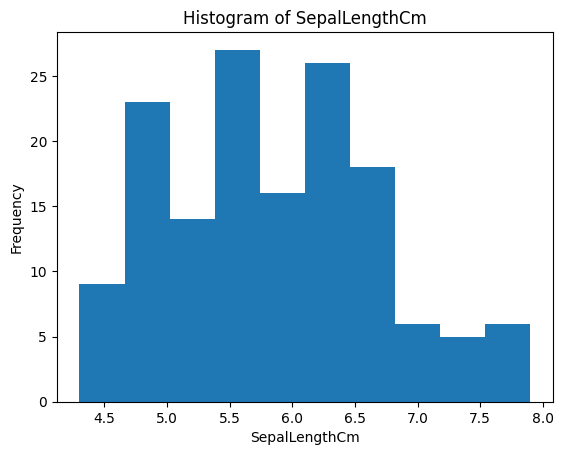

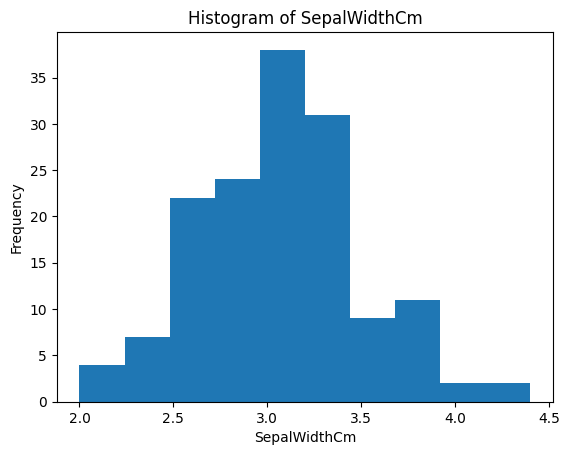

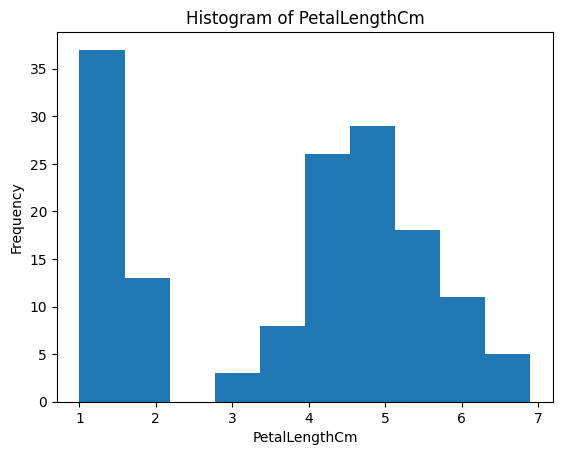

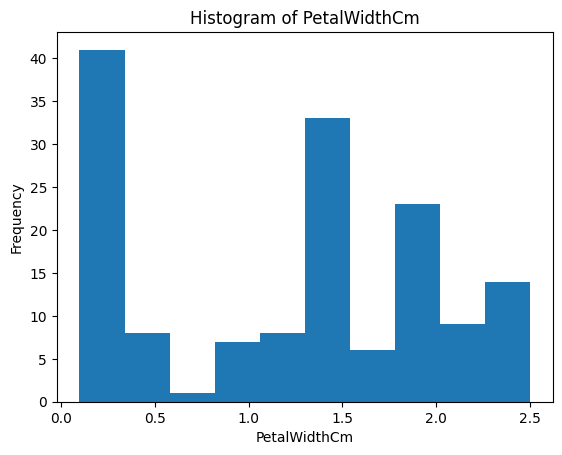

In [60]:
#1 Plot the histograms for each of the four quantitative variables
plt.hist(iris['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.title('Histogram of SepalLengthCm')
plt.show()
plt.hist(iris['SepalWidthCm'])
plt.xlabel('SepalWidthCm')
plt.ylabel('Frequency')
plt.title('Histogram of SepalWidthCm')
plt.show()
plt.hist(iris['PetalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('Frequency')
plt.title('Histogram of PetalLengthCm')
plt.show()
plt.hist(iris['PetalWidthCm'])
plt.xlabel('PetalWidthCm')
plt.ylabel('Frequency')
plt.title('Histogram of PetalWidthCm')
plt.show()

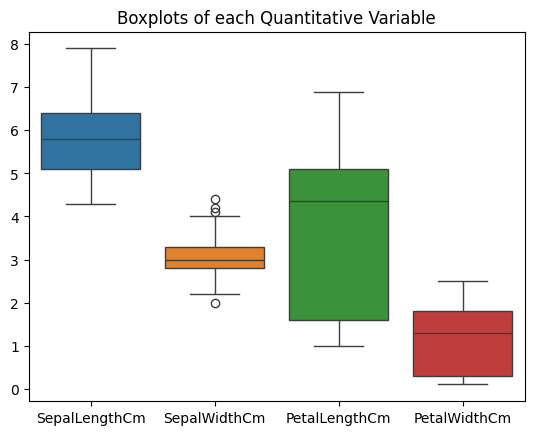

In [62]:
#3 Plot the boxplots for each of the quantitative variables
sns.boxplot(data=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
plt.title('Boxplots of each Quantitative Variable')
plt.show()

<Axes: ylabel='PetalWidthCm'>

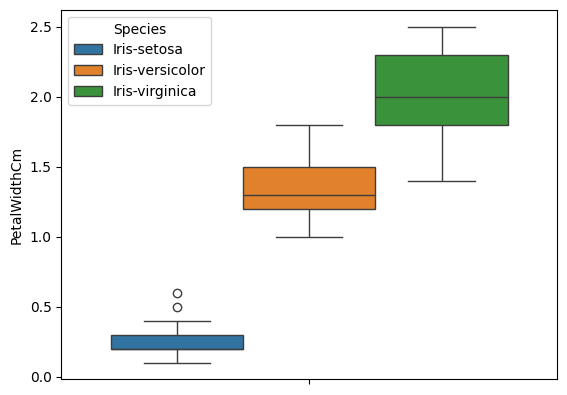

In [67]:
#4 Plot the boxplots of the petal width grouped by type of flower
sns.boxplot(data=iris, y="PetalWidthCm", hue="Species")

<Axes: ylabel='SepalLengthCm'>

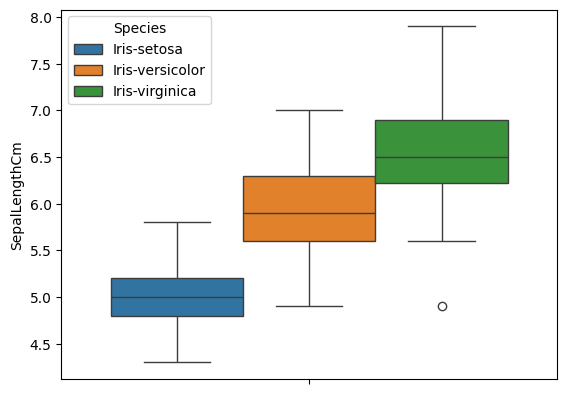

In [68]:
#5 Plot the boxplots of the setal length grouped by type of flower
sns.boxplot(data=iris, y="SepalLengthCm", hue="Species")

<Axes: ylabel='PetalLengthCm'>

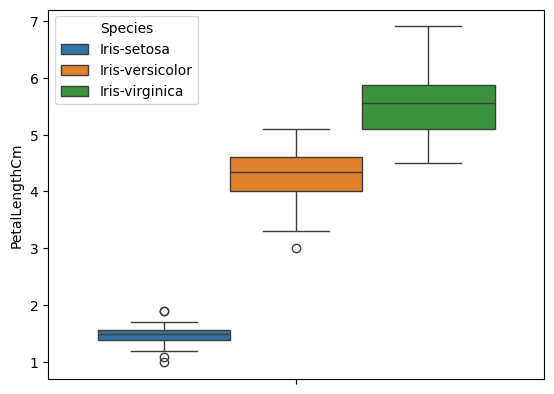

In [70]:
sns.boxplot(data=iris, y="PetalLengthCm", hue="Species")

6. Provide a description (explaination from your observations) of each of the quantitative variables

Sepal Length: Por lo que se puede apreciar el largo del sepalo es dentro de lo que cabe bastante normalizada con valores similares a diferencia de otros valores entre las distintas especies de flores.

Sepal Width: Lo que se puede apreciar es que es sin ninguna duda la variable mas estable entre especies y en general entre sus valores ya que no sufren una gran variacion con una desviacion estandar de 0.4.

Petal Length: Esta medicion sufre un pequeño caso en donde hay una gran diversidad y variedad debido a que una especie si desentona totalmente de los valores de los otras dos especies. Lo cual da como resultado la desviacion estadar mas alta de todos los datos de 1.76.

Petal Width: Al igual que con el largo del petalo el ancho varia bastante entre las propias especies y en general entre las distintas observaciones aunque esta variacion no esta tan extrema como en el caso del largo.